### Import Libraries

In [1]:
%config InlineBackend.figure_format = 'retina'
%matplotlib inline

import os
os.environ['KERAS_BACKEND'] = "tensorflow"
#TensorFlow: Channels last order.
#Theano: Channels first order.
#CNTK: Channels last order.

In [2]:
import matplotlib
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
import numpy as np
import imageio as im
from keras import models
from keras.datasets import cifar10
from keras.models import load_model, Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization
from keras.constraints import maxnorm
from keras.callbacks import ModelCheckpoint
from keras import backend as K
#K.set_image_dim_ordering('tf') 
K.image_data_format() == 'channels_last'
from keras.utils import np_utils
from PIL import Image

### Load and Visualize Data

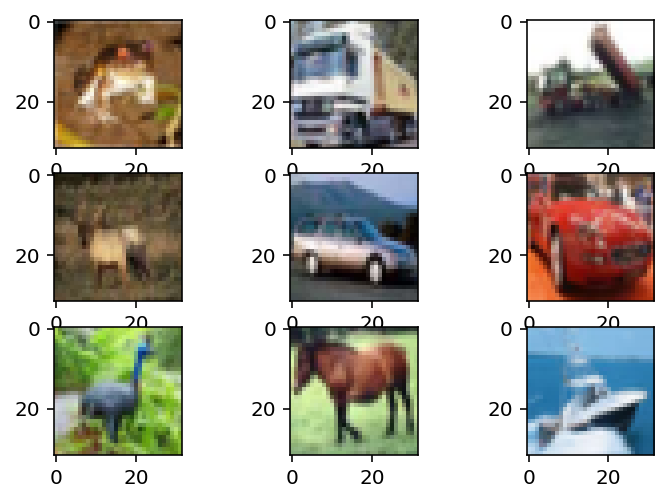

In [3]:
def visualize_cifar10(X_train):
    for i in range(0, 9):  # Create a grid with 3x3 images
        plt.subplot(330 + 1 + i)
        plt.imshow(Image.fromarray(X_train[i]))
    plt.show()
    
def data_preparation():
    
    ((X_train, y_train), (X_test, y_test)) = cifar10.load_data()
    
    visualize_cifar10(X_train)
    
    # X_train = (50000, 32, 32, 3)
    X_train = X_train.astype('float32')
    X_test = X_test.astype('float32')
    
    # Normalize inputs from 0-255 to 0.0-1.0
    X_train = X_train / 255.0
    X_test = X_test / 255.0

    # Transform the label which is an integer into binary categories
    # The value becomes that corresponding to the position, class 5 becomes the list [0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
    y_train = np_utils.to_categorical(y_train)
    y_test = np_utils.to_categorical(y_test)
    num_classes = y_test.shape[1]
    
    return X_train, X_test, y_train, y_test, num_classes

X_train, X_test, y_train, y_test, num_classes = data_preparation()

### Model Execution

In [4]:
def create_model_cnn_simple(num_classes):
    model = Sequential()
    model.add(Conv2D(32, (3, 3), input_shape=(32, 32, 3), padding='same', activation='relu', kernel_constraint=maxnorm(3)))
    model.add(Conv2D(32, (3, 3), activation='relu',padding='same', kernel_constraint=maxnorm(3)))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Flatten())
    model.add(Dense(512, activation='relu', kernel_constraint=maxnorm(3)))
    model.add(Dropout(0.5))
    model.add(Dense(num_classes, activation='softmax'))
    return model

def create_model_cnn_plus(num_classes):
    model = Sequential()
    model.add(Conv2D(32, (3, 3), input_shape=(32, 32, 3),activation='relu', padding='same'))
    model.add(Conv2D(32, (3, 3), activation='relu', padding='same'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(BatchNormalization())
    model.add(Conv2D(64, (3, 3), activation='relu', padding='same'))
    model.add(Dropout(0.2))
    model.add(Conv2D(64, (3, 3), activation='relu', padding='same'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Flatten())
    model.add(BatchNormalization())
    model.add(Dense(1024, activation='relu', kernel_constraint=maxnorm(3)))
    model.add(Dropout(0.2))
    model.add(Dense(512, activation='relu', kernel_constraint=maxnorm(3)))
    model.add(Dropout(0.2))
    model.add(Dense(num_classes, activation='softmax'))
    return model

def create_model_cnn_plus_plus(num_classes):
    model = Sequential()
    model.add(Conv2D(32, (3, 3), input_shape=(32, 32, 3),activation='relu', padding='same'))
    model.add(Conv2D(32, (3, 3), activation='relu', padding='same'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(BatchNormalization())
    model.add(Conv2D(64, (3, 3), activation='relu', padding='same'))
    model.add(Dropout(0.2))
    model.add(Conv2D(64, (3, 3), activation='relu', padding='same'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(BatchNormalization())
    model.add(Conv2D(128, (3, 3), activation='relu', padding='same'))
    model.add(Dropout(0.2))
    model.add(Conv2D(128, (3, 3), activation='relu', padding='same'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Flatten())
    model.add(BatchNormalization())
    model.add(Dense(1024, activation='relu', kernel_constraint=maxnorm(3)))
    model.add(Dropout(0.2))
    model.add(Dense(512, activation='relu', kernel_constraint=maxnorm(3)))
    model.add(Dropout(0.2))
    model.add(Dense(num_classes, activation='softmax'))
    return model

def create_model_cnn_lenet5(num_classes):
    model = Sequential()
    model.add(Conv2D(filters=32, kernel_size=(5,5), padding='same', activation='relu', input_shape=(28, 28, 1)))
    model.add(MaxPool2D(strides=2))
    model.add(Conv2D(filters=48, kernel_size=(5,5), padding='valid', activation='relu'))
    model.add(MaxPool2D(strides=2))
    model.add(Flatten())
    model.add(Dense(256, activation='relu'))
    model.add(Dense(84, activation='relu'))
    model.add(Dense(10, activation='softmax'))
    return model

model = create_model_cnn_plus_plus(num_classes)

In [5]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 32, 32, 32)        896       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 32, 32, 32)        9248      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 16, 16, 32)        0         
_________________________________________________________________
batch_normalization (BatchNo (None, 16, 16, 32)        128       
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 16, 16, 64)        18496     
_________________________________________________________________
dropout (Dropout)            (None, 16, 16, 64)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 16, 16, 64)        3

In [6]:
# Compile model
model.compile(loss='categorical_crossentropy', optimizer='sgd', metrics=['accuracy'])
#model.compile(loss = 'categorical_crossentropy', optimizer = 'rmsprop', metrics = ['accuracy'])

In [7]:
checkpointer = ModelCheckpoint(filepath="best_weights_CIFAR10.hdf5", monitor = 'val_accuracy', verbose=1, save_best_only=True)

In [8]:
history = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=15, batch_size=200, verbose=1, callbacks=[checkpointer])

Epoch 1/15
250/250 [==============================] - 301s 1s/step - loss: 2.1367 - accuracy: 0.2433 - val_loss: 2.9443 - val_accuracy: 0.1011

Epoch 00001: val_accuracy improved from -inf to 0.10110, saving model to best_weights_CIFAR10.hdf5
Epoch 2/15
250/250 [==============================] - 343s 1s/step - loss: 1.5986 - accuracy: 0.4145 - val_loss: 1.7875 - val_accuracy: 0.3673

Epoch 00002: val_accuracy improved from 0.10110 to 0.36730, saving model to best_weights_CIFAR10.hdf5
Epoch 3/15
250/250 [==============================] - 305s 1s/step - loss: 1.4190 - accuracy: 0.4832 - val_loss: 1.4385 - val_accuracy: 0.4909

Epoch 00003: val_accuracy improved from 0.36730 to 0.49090, saving model to best_weights_CIFAR10.hdf5
Epoch 4/15
250/250 [==============================] - 306s 1s/step - loss: 1.3308 - accuracy: 0.5199 - val_loss: 1.4209 - val_accuracy: 0.5016

Epoch 00004: val_accuracy improved from 0.49090 to 0.50160, saving model to best_weights_CIFAR10.hdf5
Epoch 5/15
250/250 

In [9]:
model.load_weights('best_weights_CIFAR10.hdf5')

In [10]:
# To save:
model.save('CIFAR10_cnn.h5')

# To use:
#model=load_model('CIFAR10_cnn.h5')

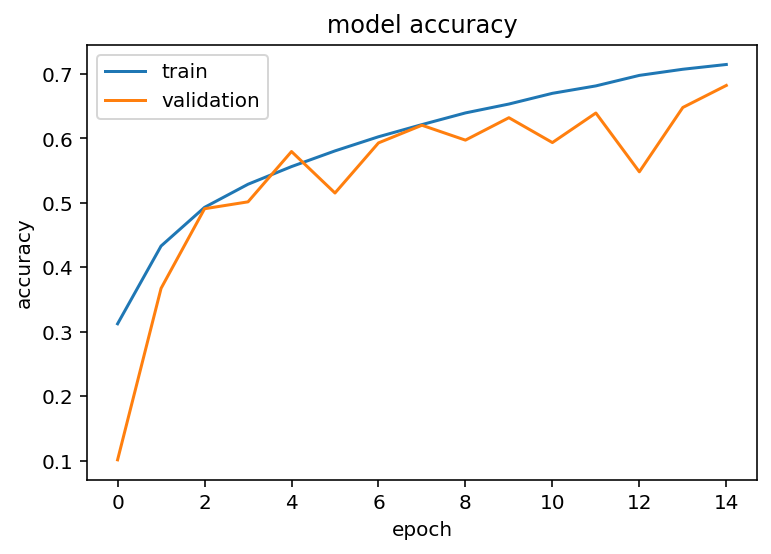

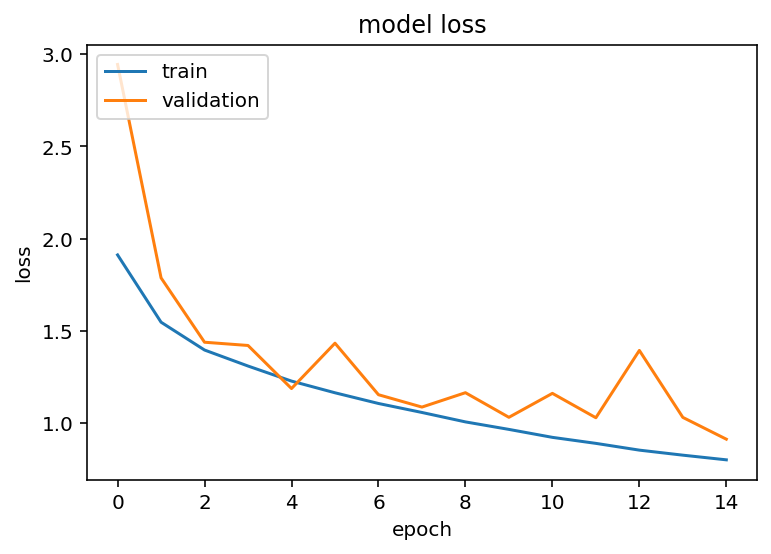

In [11]:
# Utils to visualize the history of the learning
def print_history_accuracy(history):
    #print(history.history.keys())
    plt.plot(history.history['accuracy'])
    plt.plot(history.history['val_accuracy'])
    plt.title('model accuracy')
    plt.ylabel('accuracy')
    plt.xlabel('epoch')
    plt.legend(['train', 'validation'], loc='upper left')
    plt.show()

def print_history_loss(history):
    #print(history.history.keys())
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.title('model loss')
    plt.ylabel('loss')
    plt.xlabel('epoch')
    plt.legend(['train', 'validation'], loc='upper left')
    plt.show()

print_history_accuracy(history)
print_history_loss(history)

X_test: (10000, 32, 32, 3)
y_test: (10000, 10)
Image: (32, 32, 3)


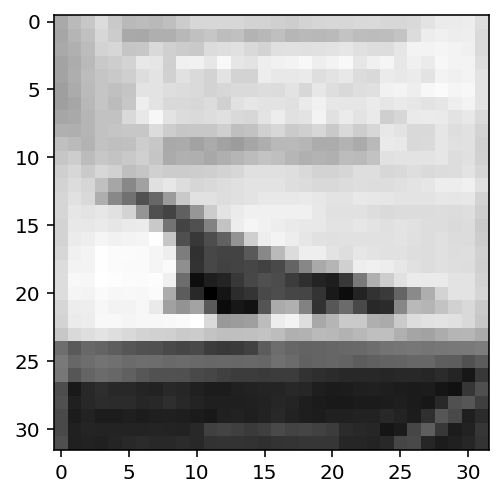

Label: [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
Before increasing another dimension: (32, 32, 3)
After increasing another dimension: (1, 32, 32, 3)
Prediction: [[5.4636008e-01 1.7711032e-03 9.8438691e-03 3.7586011e-04 1.6743684e-03
  1.9797815e-05 5.1138084e-04 4.8792273e-05 4.3828854e-01 1.1061513e-03]]
Predicted Class: [0]


/usr/local/anaconda3/lib/python3.8/site-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


In [12]:
# View image, label and corresponding prediction
def visualize_prediction(x_test, y_test, img_to_show):
    print("X_test:",x_test.shape)
    print("y_test:",y_test.shape)
    print("Image:",x_test[img_to_show].shape)
    plt.imshow(x_test[img_to_show,:,:,0], cmap='gray')
    plt.show()
    print("Label:",y_test[img_to_show])
    print("Before increasing another dimension:",x_test[img_to_show].shape)
    image_tensor = np.expand_dims(x_test[img_to_show], axis=0)
    print("After increasing another dimension:",image_tensor.shape)
    print("Prediction:",model.predict(image_tensor))
    classes = model.predict_classes(image_tensor)
    print('Predicted Class:',classes)
    return image_tensor


image_tensor = visualize_prediction(X_test, y_test, 3)

### Featuremaps Visualization

In [13]:
# Let's get the outputs of the first 5 (plus) layers of the network or 12 for plus_plus
output_layers = []
for layer in model.layers[:5]:
    print(layer.output.shape)
    output_layers.append(layer.output)

# And then we create a model that returns these outputs given the model inputs
activation_model = models.Model(inputs=model.input, outputs=output_layers)

(None, 32, 32, 32)
(None, 32, 32, 32)
(None, 16, 16, 32)
(None, 16, 16, 32)
(None, 16, 16, 64)


In [14]:
activations = activation_model.predict(image_tensor) 
# Returns a list of two Numpy arrays: one array per activation layer

In [15]:
first_layer_activation = activations[0]
print(first_layer_activation.shape)

(1, 32, 32, 32)


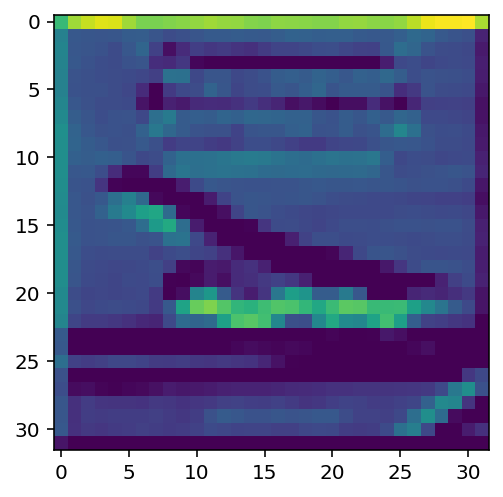

In [16]:
plt.imshow(first_layer_activation[0, :, :, 9], cmap='viridis')
plt.show()

layer_name: conv2d
n_features: 32
size: 32
n_lines: 2
layer_name: conv2d_1
n_features: 32
size: 32
n_lines: 2
layer_name: max_pooling2d
n_features: 32
size: 16
n_lines: 2
layer_name: batch_normalization
n_features: 32
size: 16
n_lines: 2
layer_name: conv2d_2
n_features: 64
size: 16
n_lines: 4


<ipython-input-17-c80eb266c1dc>:20: RuntimeWarning: invalid value encountered in true_divide
  image /= image.std()
<ipython-input-17-c80eb266c1dc>:20: RuntimeWarning: divide by zero encountered in true_divide
  image /= image.std()


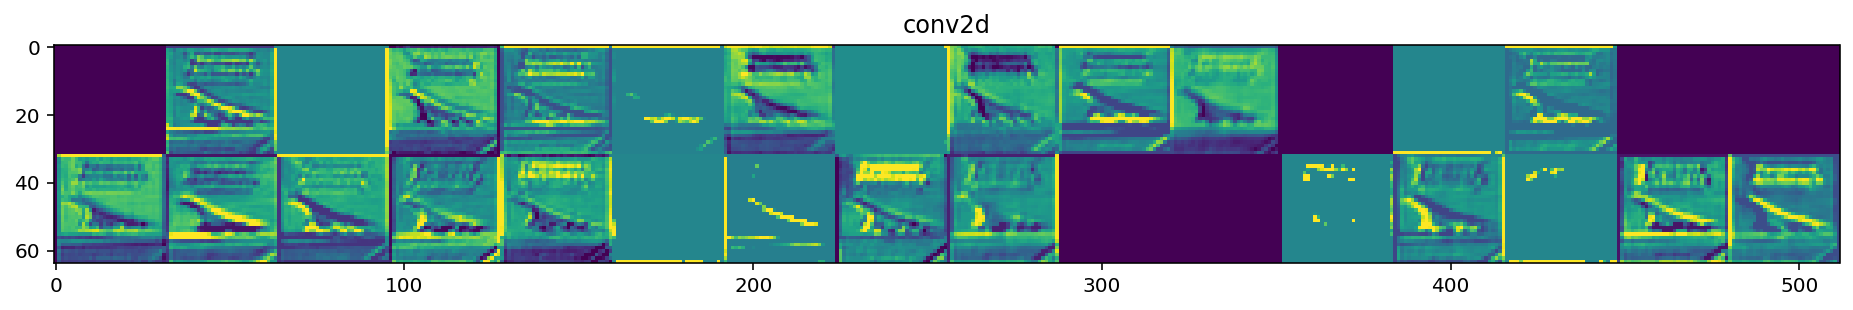

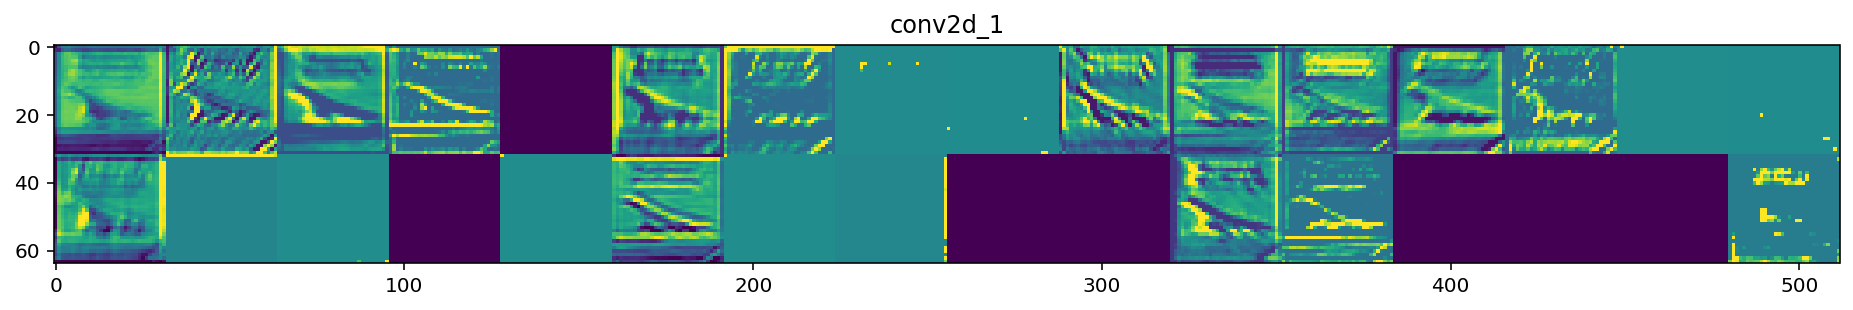

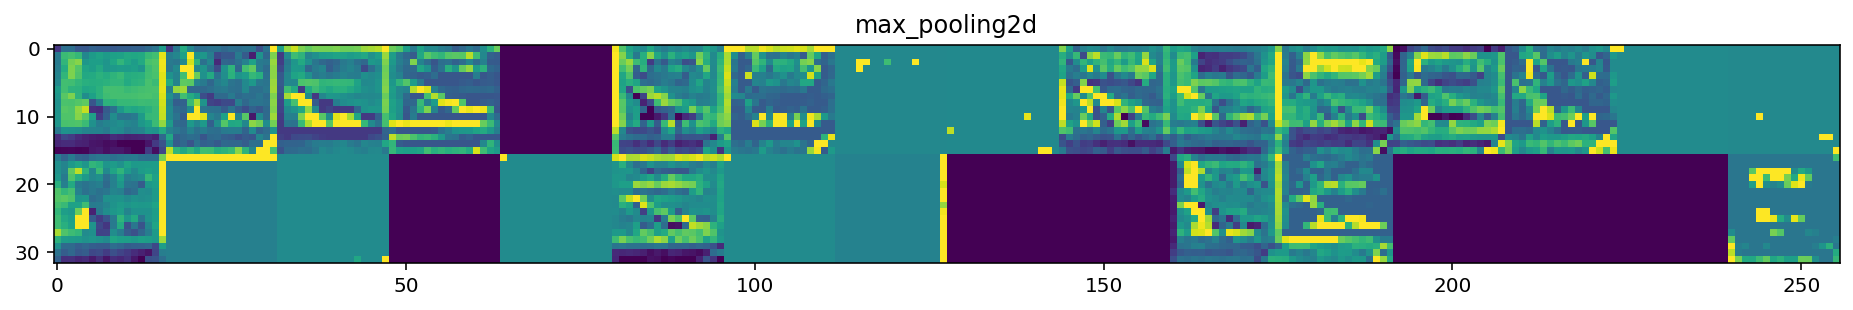

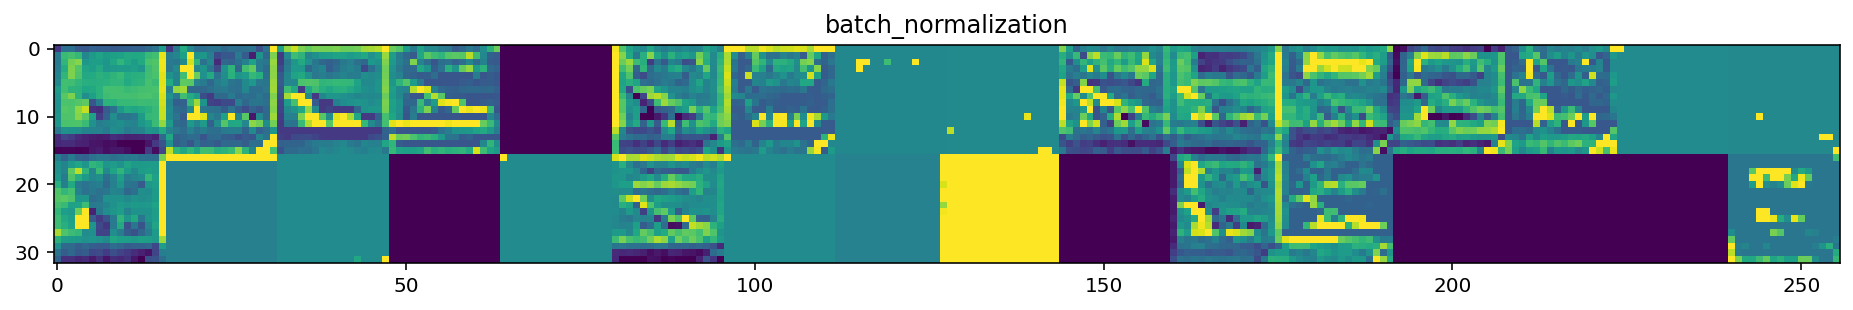

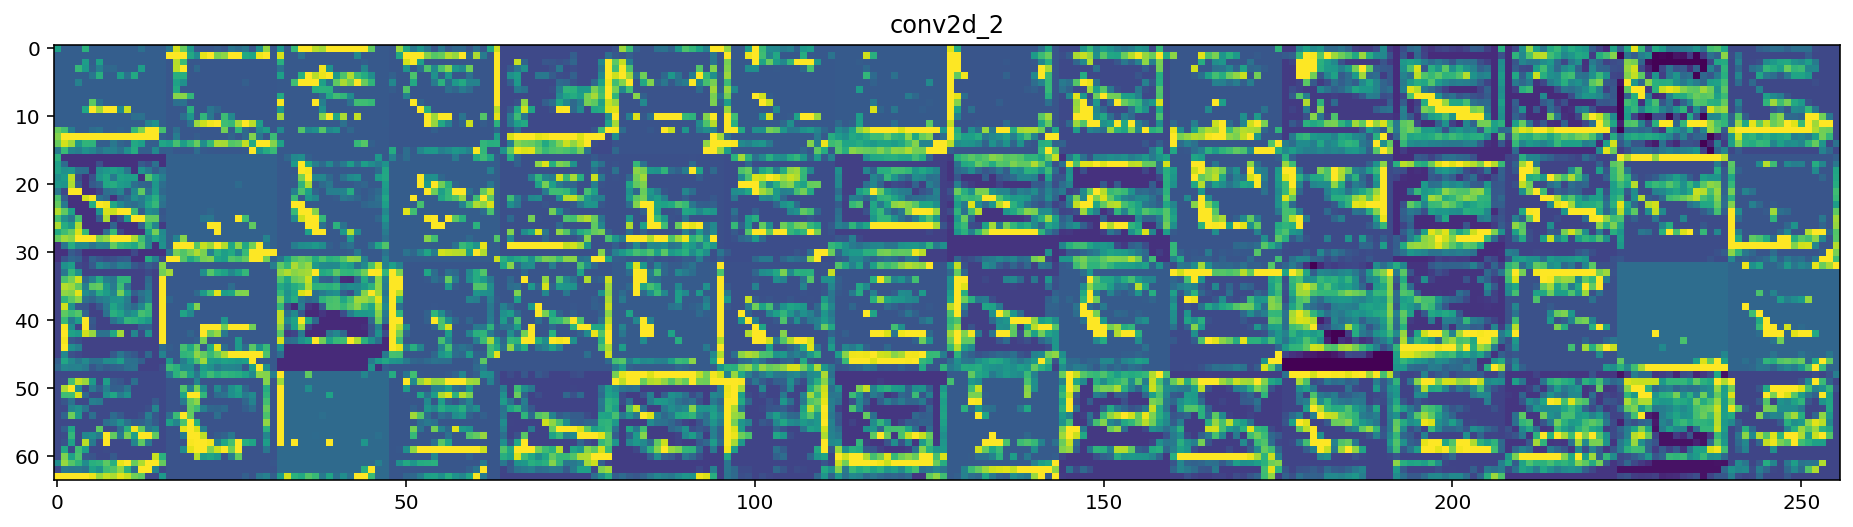

In [17]:
layers_names = []
for layer in model.layers[:5]:
    layers_names.append(layer.name)
    
images_per_line = int(first_layer_activation.shape[3] / 2)

for layer_name, activation_layer in zip(layers_names, activations):
    n_features = activation_layer.shape[-1]
    size = activation_layer.shape[1]
    n_lines = -(-n_features // images_per_line)
    print("layer_name:",layer_name)
    print("n_features:",n_features)
    print("size:",size)
    print("n_lines:",n_lines)
    display_grid = np.zeros((size * n_lines, images_per_line * size))
    for col in range(n_lines):
        for lin in range(images_per_line):
            image = activation_layer[0,:,:,col * images_per_line + lin]
            image -= image.mean()
            image /= image.std()
            image *= 64
            image += 128
            image = np.clip(image, 0, 255).astype('uint8')
            display_grid[col * size : (col + 1) * size,lin * size : (lin + 1) * size] = image
    scale = 1. / size
    plt.figure(figsize=(scale * display_grid.shape[1],
                        scale * display_grid.shape[0]))
    plt.title(layer_name)
    plt.grid(False)
    plt.imshow(display_grid, aspect='auto', cmap='viridis')